In [136]:
import collections

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import sklearn.preprocessing
import tensorflow as tf

from convolution import ConvolutionalNN, train_cnn

sns.set(font_scale=1.5, palette='colorblind')

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
cnn = ConvolutionalNN(28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
scaler = sklearn.preprocessing.StandardScaler()

scale = lambda x, scaler: scaler.fit_transform(x.reshape(-1, 28*28))

x_train_n = scale(x_train, scaler)
x_test_n = scale(x_test, scaler)

/Users/srom/workspace/ds/env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
inverse_scale = lambda x, scaler: scaler.inverse_transform(x.reshape(-1, 28*28)).reshape(-1, 28, 28)

In [6]:
save_path = train_cnn(
    cnn, 
    x_train, 
    y_train, 
    x_test, 
    y_test, 
    learning_rate=0.001,
    n_epochs=10000,
    batch_size=100,
)

0 / 10000: loss = 45.12434387207031
1000 / 10000: loss = 0.3183335065841675
2000 / 10000: loss = 0.21357344090938568
3000 / 10000: loss = 0.17691805958747864
4000 / 10000: loss = 0.16644687950611115
5000 / 10000: loss = 0.1662217229604721
6000 / 10000: loss = 0.14202781021595
7000 / 10000: loss = 0.14913500845432281
8000 / 10000: loss = 0.139211967587471
9000 / 10000: loss = 0.1551295816898346


In [54]:
def accuracy(cnn, save_path, x_test, y_test):
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        saver.restore(sess, save_path)
        
        logits = sess.run(cnn.logits, feed_dict={cnn.x: x_test})
        
    results = np.argmax(logits, axis=1)
    
    return sum([results[i] == y for i, y in enumerate(y_test)]) / len(results), results

In [55]:
accuracy, results = accuracy(cnn, save_path, x_test, y_test)
accuracy

INFO:tensorflow:Restoring parameters from ./cnn.ckpt


0.9729

In [67]:
def convolutions(cnn, save_path, x):
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        saver.restore(sess, save_path)
        
        return sess.run(cnn.conv, feed_dict={cnn.x: x})

In [68]:
convolutions = convolutions(cnn, save_path, x_test_n)

INFO:tensorflow:Restoring parameters from ./cnn.ckpt


In [69]:
convolutions = np.moveaxis(convolutions, 3, 1)

In [112]:
is_bad = [results[i] != y_test[i] for i in range(len(y_test))]
bad = [i for i, v in enumerate(is_bad) if v]

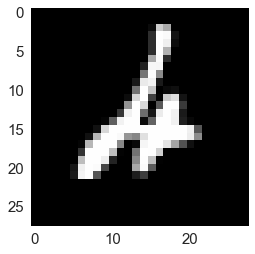

In [129]:
idx = bad[3]
plt.imshow(x_test[idx], cmap='Greys_r')
plt.grid(None)

In [130]:
results[idx], results[idx] == y_test[idx], y_test[idx]

(6, False, 4)

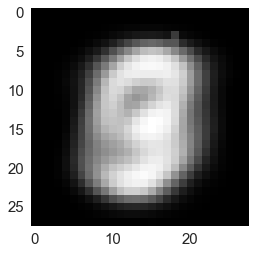

In [131]:
img = inverse_scale(convolutions[idx][0], scaler)[0]
plt.imshow(img, cmap='Greys_r')
plt.grid(None)

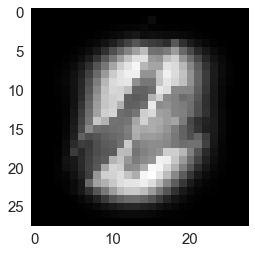

In [132]:
img = inverse_scale(convolutions[idx][1], scaler)[0]
plt.imshow(img, cmap='Greys_r')
plt.grid(None)

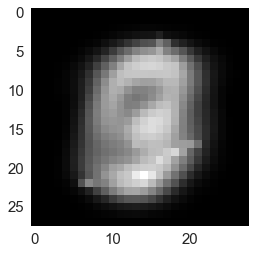

In [133]:
img = inverse_scale(convolutions[idx][2], scaler)[0]
plt.imshow(img, cmap='Greys_r')
plt.grid(None)

In [137]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test, results)

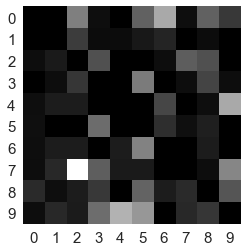

In [147]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(range(10))
plt.yticks(range(10))
plt.grid(False)